# Make crops, not war

# Table of Contents
<div class="toc"><ul class="toc-item">

<li><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-1">Data Wrangling</a></li>
    <ul ><li><a href="#Size" data-toc-modified-id="Data-Wrangling-1.1">Size</a></li>
                        <ul>
                            <li><a href="#Wars-Datasets" data-toc-modified-id="Data-Wrangling-1.1.1">Wars Datasets</a></li>
                            <li><a href="#Agriculture-and-Food-Datasets" data-toc-modified-id="Data-Wrangling-1.1.2">Agriculture and Food Datasets</a></li></ul>
                      <li><a href="#Formats" data-toc-modified-id="Data-Exploration-1.2">Format</a></li>
                        <ul>
                            <li><a href="#Wars" data-toc-modified-id="Data-Exploration-1.2.1">Wars Datasets</a></li>
                            <li><a href="#Agriculture-and-Food-Datasets" data-toc-modified-id="Data-Exploration-1.2.2">Agriculture and Food Datasets</a></li></ul>
                      <li><a href="#Missing-values" data-toc-modified-id="Data-Exploration-1.3">Missing values</a></li>
                        <ul>
                            <li><a href="#Wars" data-toc-modified-id="Data-Exploration-1.3.1">Wars Datasets</a></li>
                            <li><a href="#Food-Related" data-toc-modified-id="Data-Exploration-1.3.2">Agriculture and Food Datasets</a></li></ul>
    </ul>
 <li><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1">Data Exploration</a></li>
    <ul ><li><a href="#Distributions" data-toc-modified-id="Data-Exploration-1.1">Distributions</a></li>
                        <ul type="circle"><li>War</li><li>Agriculture</li></ul>
                      <li><a href="#Correlations" data-toc-modified-id="Data-Exploration-1.2">Correlations</a></li>
    </ul>   
<li>Our project</li>
    </ul> </div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

%matplotlib inline

sns.set_style('whitegrid')

# add time converter for matplotlib visualisation
pd.plotting.register_matplotlib_converters()

# Data Wrangling

## Size

### Wars Datasets

For the data on wars, we are going to use data obtained from **[Wikidata Query Service](https://query.wikidata.org/)**. As we selected only the data in which we are interested in, the **dataset is quite small** as we can see below:

In [2]:
# Set folder name
wikipedia_path = 'data/wikipedia/'

# Set filenames
state_in_war_file = 'states.json'
political_in_war_file = 'political.json'
terroristic_in_war_file = 'terroristic.json'

# Read the files
wars_states_df = pd.read_json(wikipedia_path + state_in_war_file, orient='records', encoding='utf-8')
wars_political_df = pd.read_json(wikipedia_path + political_in_war_file, orient='records', encoding='utf-8')
wars_terroristic_df = pd.read_json(wikipedia_path + terroristic_in_war_file, orient='records', encoding='utf-8')

For now, we are not interested in the **differences** between these three categories, but only between **state and non-state actors**. We therefore only mark whether a participant is state or non-state. Next we stack the dataframes to create a unique one.

In [3]:
# Mark the elements of the DFs as either state or non-state actors
wars_states_df['is_state'] = True
wars_political_df['is_state'] = False
wars_terroristic_df['is_state'] = False

# Stack the dataframes
raw_wars_df = wars_states_df.append(wars_political_df, sort=True).append(wars_terroristic_df, sort=True)

# Rename the columns to a more readable style
renamed_wars_df = raw_wars_df.rename(columns={
    'armed_conflictLabel': 'name',
    'participantLabel': 'participant',
    'countryWarLabel': 'country',
    'locationLabel': 'location'
})

print(f"Length of wars dataframe: {renamed_wars_df.size}")

Length of wars dataframe: 7665


The dataframe can be kept in memory.

### Agriculture and Food Datasets

For food-related data, we are using data from **[FAOSTAT](http://www.fao.org/faostat/en/#data) website**. Here we can query FAO database as well and can download only the datasets we need. Particularly, we are interested in the following datasets:

- [Crops](http://www.fao.org/faostat/en/#data/QC)
- [Live Animals](http://www.fao.org/faostat/en/#data/QA)
- [Annual Population](http://www.fao.org/faostat/en/#data/OA)
- [Land Use](http://www.fao.org/faostat/en/#data/RL)

These **datasets are quite small** and can be kept in memory.

In [4]:
# Set folder name
fao_path = 'data/fao/'

# Set filenames
crops_production_file = 'crops_production.csv'
livestock_production_file = 'livestock_production.csv'
population_file = 'population.csv'
land_use_file = 'land_use.csv'

# Read the files
raw_crops_production_df = pd.read_csv(fao_path + crops_production_file, encoding='latin-1')
raw_livestock_production_df = pd.read_csv(fao_path + livestock_production_file, encoding='latin-1')
raw_population_df = pd.read_csv(fao_path + population_file, encoding='latin-1')
raw_land_use_df = pd.read_csv(fao_path + land_use_file, encoding='latin-1')

# Create an array with the names to iterate over the dataframes
agricultural_dfs_names = ['crops', 'livestock', 'population', 'land']

# Create an array of dataframes to easily iterate over them
agricultural_dfs = [
    raw_crops_production_df,
    raw_livestock_production_df,
    raw_population_df,
    raw_land_use_df
]

# Iterate over names and dataframes to print the size
for name, df in zip(agricultural_dfs_names, agricultural_dfs):
    print(f"Length of {name} dataframe: {df.size}")

Length of crops dataframe: 1437366
Length of livestock dataframe: 472752
Length of population dataframe: 223725
Length of land dataframe: 170100


All these datasets can be easily handled by a laptop.

## Formats

### Wars

Now, let us **check the types** of the columns of the dataframes:

In [5]:
renamed_wars_df.dtypes

name            object
country         object
end_year       float64
is_state          bool
location        object
participant     object
start_year       int64
dtype: object

The other two war dataframes have the same formats. We can see that the years have different types. It can be useful to convert them to `datetime` years. We are doing it after dealing with missing values.

### Agriculture and Food Datasets

In [6]:
for name, df in zip(agricultural_dfs_names, agricultural_dfs):
    print(f"Types in {name} dataframe:\n {df.dtypes}\n")

Types in crops dataframe:
 Domain Code          object
Domain               object
Area Code             int64
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

Types in livestock dataframe:
 Domain Code          object
Domain               object
Area Code             int64
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object

Types in population dataframe:
 Domain Code          object
Domain               object
Area Code             int64
Area        

## Missing values

### Wars

Let us check whether there are missing values in the wars dataframe:

In [7]:
print("Number of wars with missing data: " + 
      str(renamed_wars_df[renamed_wars_df.isnull().any(axis=1)].groupby('name').count().shape[0]))

print("Columns with missing data:")
renamed_wars_df.columns[renamed_wars_df.isnull().any()].tolist()

Number of wars with missing data: 35
Columns with missing data:


['country', 'end_year', 'location']

#### Missing end year

Let us check which entries have missing end year:

In [8]:
missing_end_year_wars = (
    # Get the lines missing `end_year`
    renamed_wars_df
        .loc[
            # Get the rows missing end year
            renamed_wars_df['end_year'].isnull(),
            # Select the name and start year
            ['name', 'start_year']
        ]
        # Remove duplicates
        .drop_duplicates()
)

missing_end_year_wars

,name,start_year
46,Shelling of Yeonpyeong,2010
82,Cabinda Conflict,1975
86,War in North-West Pakistan,2004
90,Darfur conflict,2003
170,Kurdish–Turkish conflict,2015
193,Kivu conflict,2004
304,Kachin conflict,1961
331,War in Donbass,2014
348,Iraqi Civil War (2014–present),2014
352,War in Afghanistan (2015–),2015


Among these wars, only the [Shelling of Yeonpyeong](https://en.wikipedia.org/wiki/Bombardment_of_Yeonpyeong) has come to an end (it has actually a one-day event). All the others are still conflicts which are still ongoing (even the older ones). As a matter of fact, due to how the Wikidata query is made, the wars without an **end date** have not finished yet. Hence, we can fill the value with the last year in FAO dataset, which is 2017:

In [9]:
from datetime import datetime

# Set end year of Shelling of Yeonpyeong to 2010
renamed_wars_df.loc[renamed_wars_df['name'] == 'Shelling of Yeonpyeong', 'end_year'] = 2010

# Set the current year for the other wars which are ongoing
renamed_wars_df.loc[renamed_wars_df['end_year'].isnull(), 'end_year'] = 2017

In [10]:
# Change start year and end year to datetime objects
renamed_wars_df['start_year'] = pd.to_datetime(renamed_wars_df['start_year'], format='%Y')
renamed_wars_df['end_year'] = pd.to_datetime(renamed_wars_df['end_year'].astype(int), format='%Y')

Now, let us see check how many wars are missing the **country** where the war took place:

In [11]:
print("Number of wars with missing country: " + 
      str(renamed_wars_df.loc[renamed_wars_df['country'].isnull(), 'name'].drop_duplicates().shape[0]))

Number of wars with missing country: 21


As there are few, we can fill the country manually, and since we are not interested in the precise location of the wars, we can drop the column location.

In [12]:
# Show the unique wars with missing cou
renamed_wars_df.loc[renamed_wars_df['country'].isnull(), ['name', 'country', 'location']].drop_duplicates()

,name,country,location
702,Soviet–Afghan War,NaN,Democratic Republic of Afghanistan
703,Tet Offensive,NaN,South Vietnam
713,War on Terror,NaN,NaN
719,Kosovo War,NaN,Kosovo
739,Lord's Resistance Army insurgency,NaN,NaN
743,Insurgency in the Maghreb (2002–),NaN,Maghreb
745,Sino-Vietnamese War,NaN,North Vietnam
754,Cambodian Civil War,NaN,Khmer Republic
757,Cambodian Civil War,NaN,Kingdom of Cambodia
762,First Congo War,NaN,Zaire


In [13]:
non_null_wars_df = renamed_wars_df.copy()

# Fix missing country
non_null_wars_df.loc[non_null_wars_df['name'] == 'Tet Offensive', 'country'] = 'Vietnam'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Kosovo War', 'country'] = 'Kosovo'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Soviet–Afghan War', 'country'] = 'Afghanistan'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Cambodian Civil War', 'country'] = 'Cambodia'
non_null_wars_df.loc[non_null_wars_df['name'] == 'First Congo War', 'country'] = 'Democratic Republic of the Congo'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Djiboutian Civil War', 'country'] = 'Djibouti'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Libyan–Egyptian War', 'country'] = 'Libya,Egypt'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Paquisha War', 'country'] = 'Ecuador,Peru'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Sino-Vietnamese War', 'country'] = 'Vietnam'
non_null_wars_df.loc[non_null_wars_df['name'] == '1982 Ethiopian–Somali Border War', 'country'] = 'Somalia'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Ceneps Guar', 'country'] = 'Ecuador,Peru'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Second Kurdish–Iraqi War', 'country'] = 'Iraq'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Vietnam War', 'country'] = 'Vietnam'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Six-Day War', 'country'] = 'Israel,Egypt,Palestine,Syria'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Tell Abyad offensive', 'country'] = 'Syria'
non_null_wars_df.loc[non_null_wars_df['name'] == '2006 Lebanon War', 'country'] = 'Lebanon,Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Gaza–Israel clashes (May 2019)', 'country'] = 'Israel,Palestine'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Tell Abyad offensive', 'country'] = 'Syria'
non_null_wars_df.loc[non_null_wars_df['name'] == '2006 Lebanon War', 'country'] = 'Lebanon,Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Gaza–Israel clashes (May 2019)', 'country'] = 'Israel,Palestine'
non_null_wars_df.loc[non_null_wars_df['name'] == '2003 invasion of Iraq', 'country'] = 'Iraq'
non_null_wars_df.loc[non_null_wars_df['name'] == '2014 Israel–Gaza conflict', 'country'] = 'Palestine,Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == '2018–19 Gaza border protests', 'country'] = 'Palestine,Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Croatian War of Independence', 'country'] = 'Croatia'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Gaza–Israel conflict', 'country'] = 'Palestine, Israel'
non_null_wars_df.loc[non_null_wars_df['name'] == 'Insurgency in the Maghreb (2002–)', 'country'] = '''
    Algeria,Libya,Mauritania,Morocco,Tunisia,Western Sahara'''
non_null_wars_df.loc[non_null_wars_df['name'] == "Lord's Resistance Army insurgency", 'country'] = '''
    Uganda,South Sudan,Democratic Republic of the Congo,Central African Republic'''

# Eplode entries with multiple locations
non_null_wars_df['country'] = non_null_wars_df['country'].str.split(',')
exploded_wars_df = non_null_wars_df.reset_index().explode('country').drop('index', axis=1)

# Remove dangling spaces which are left
stripped_wars_df = exploded_wars_df.copy()
stripped_wars_df['country'] = exploded_wars_df['country'].str.strip()

Let us see what is left:

In [14]:
stripped_wars_df[stripped_wars_df['country'].isnull()]

,name,country,end_year,is_state,location,participant,start_year
713,War on Terror,NaN,2017-01-01,True,NaN,People's Republic of China,2001-01-01
714,War on Terror,NaN,2017-01-01,True,NaN,France,2001-01-01
715,War on Terror,NaN,2017-01-01,True,NaN,Islamic State of Iraq and the Levant,2001-01-01
716,War on Terror,NaN,2017-01-01,True,NaN,Russia,2001-01-01
717,War on Terror,NaN,2017-01-01,True,NaN,United Kingdom,2001-01-01
718,War on Terror,NaN,2017-01-01,True,NaN,United States of America,2001-01-01
775,Iran–Israel proxy conflict,NaN,2017-01-01,True,Middle East,Israel,2005-01-01
777,Iran–Israel proxy conflict,NaN,2017-01-01,True,Middle East,Iran,2005-01-01
803,War on Terror,NaN,2017-01-01,False,NaN,Turkistan Islamic Party,2001-01-01
804,War on Terror,NaN,2017-01-01,False,NaN,Taliban,2001-01-01


Since the [War on Terror](https://en.wikipedia.org/wiki/War_on_Terror) and Iran-Israel proxy conflict can be considered as a series of wars, and has no defined location, we drop them.

In [15]:
final_wars_df = stripped_wars_df[(stripped_wars_df['name'] != 'War on Terror') & (stripped_wars_df['name'] != 'Iran–Israel proxy conflict')]

print("Number of wars with missing country: " + 
      str(final_wars_df.loc[final_wars_df['country'].isnull(), 'name'].drop_duplicates().shape[0]))

Number of wars with missing country: 0


In [22]:
n_wars = len(final_wars_df.groupby('name').count())
n_wars

111

### Food Related

Let us first see the different unique in the features, in order to decide if we can drop them:

In [16]:
raw_crops_production_df.groupby('Flag').count()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag Description
Flag,,,,,,,,,,,,,
A,102669,102669,102669,102669,102669,102669,102669,102669,102669,102669,102669,100483,102669


In [17]:
raw_crops_production_df.groupby('Unit').count()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Value,Flag,Flag Description
Unit,,,,,,,,,,,,,
tonnes,102669,102669,102669,102669,102669,102669,102669,102669,102669,102669,100483,102669,102669


In [18]:
raw_crops_production_df.groupby('Element').count()

,Domain Code,Domain,Area Code,Area,Element Code,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
Element,,,,,,,,,,,,,
Production,102669,102669,102669,102669,102669,102669,102669,102669,102669,102669,100483,102669,102669


In [19]:
raw_crops_production_df.groupby('Domain').count()

,Domain Code,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
Domain,,,,,,,,,,,,,
Crops,102669,102669,102669,102669,102669,102669,102669,102669,102669,102669,100483,102669,102669


Since we have only **one value** for those columns, we can drop them. We just need to keep in mind that the unit used is **tonnes**. Let us **drop useless columns**, and rename the remaing ones to be more consistent with the wars dataframe naming.

In [20]:
def drop_useless_columns(fao_df):

    # Keep only useful columns
    fao_df = fao_df[['Area', 'Item', 'Year', 'Value']]
    
    fao_df = fao_df.rename(columns={
        'Area': 'country',
        'Item': 'item',
        'Year': 'year',
        'Value': 'value'
    })
    
    # Convert the year to a datetime object
    fao_df['year'] = pd.to_datetime(fao_df['year'], format='%Y')
    
    return fao_df

dropped_agricultural_dfs = list(map(drop_useless_columns, agricultural_dfs))

Now, let us see if there are missing values:

In [21]:
for name, df in zip(agricultural_dfs_names, dropped_agricultural_dfs):
    print("In the {name} dataset there are {missing} missing values.".format(
        name=name,
        missing=df[df.isnull().any(axis=1)].size
    ))

# Saving the clean versions of the agricultural dfs
final_crop_df, final_livestock_df, final_population_df, final_land_df = dropped_agricultural_dfs

In the crops dataset there are 8744 missing values.
In the livestock dataset there are 1512 missing values.
In the population dataset there are 0 missing values.
In the land dataset there are 0 missing values.


We can see that many values are missing. However, since we are going to aggregate the data, we assume that the impact of missing data will be *low*. Moreover, we will need to know in which years we are missing data, in order to weight better the averages we are going to compute. When *we will need more specific data* about some particular countries, we will decide how to handle the problem in a more elaborate way.

# Data Exploration

## Distributions

Let us plot the following distributions to further explore our datasets:

- The number of years each country is in the war
- The total crop production of all countries changing during the whole time of observation (1961-2017)
- The total amount of livestock of all countries changing during the whole time of observation
- The total area of agricultural land of all countries changing during the whole time of observation
- The total human population changing during the whole time of observation

#### War-related

Let us start with the **number of years in which a country had a war**. In order to do this, we first have to **avoid that wars overlap in years**. For instance, if a country had two wars, one from 1955 to 1970, and another one from 1965 to 1971, we do not want the years from 1965 to 1970 to be counted twice.

We accomplish this by first creating a new column containing all the years of each war, next we explode the column such that we have one row per each year a country had in a specifi war. We finally take in consideration only the country and the years and remove the (overlapping) duplicates.

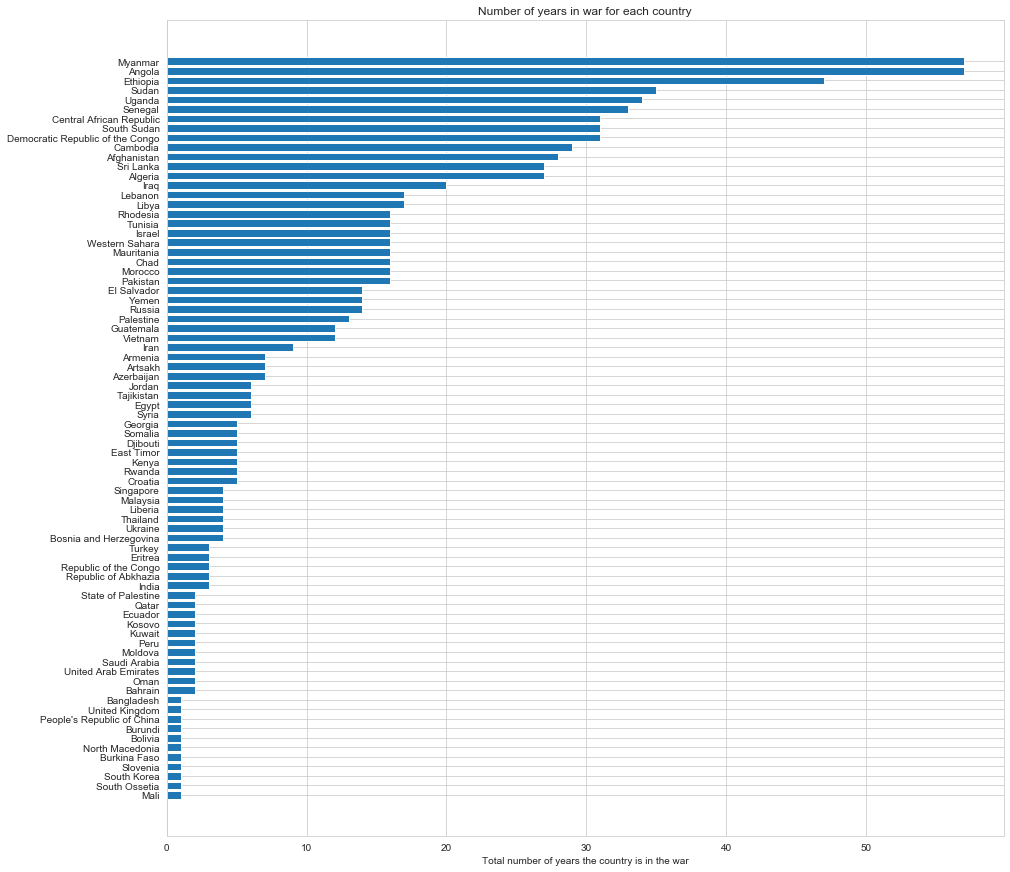

In [22]:
# Create a df that only contains the wars, the time ranges and the locations
country_wars_df = final_wars_df[['country', 'name', 'start_year', 'end_year']].drop_duplicates()

# Create a new column, range, in which we have all the years in which a country had a war
country_wars_df['years'] = country_wars_df.apply(
    # Create a range from the first to the last year of war (we want the last year to be taken in account)
    lambda row: list(range(row['start_year'].year, row['end_year'].year + 1)),
    axis=1
)

unique_years_df = (
    country_wars_df
        # Explode the years lists and take in consideration only country and years
        .explode('years')[['country', 'years']]
        # Remove overlapping years (which are duplicate (country, year) couples)
        .drop_duplicates()
        # Reset index after explode and drop newly created index column
        .reset_index()
        .drop('index', axis=1)
)

# Group by country to count the number of years in war the country had and sort
years_per_country = unique_years_df.groupby('country').count().sort_values(by='years').reset_index()

# Finally plot
plt.figure(figsize=(15,15))
plt.grid(True)
plt.barh(years_per_country['country'], years_per_country['years'])
plt.title('Number of years in war for each country')
_ = plt.xlabel('Total number of years the country is in the war')

We can easily see that luckily many countries did not have a war (e.g. European countries); some of them, on the other hand, have been in war for all the 57 years of observations.

But are long wars more or less common than short ones? Let us plot an histogram to make it clearer.

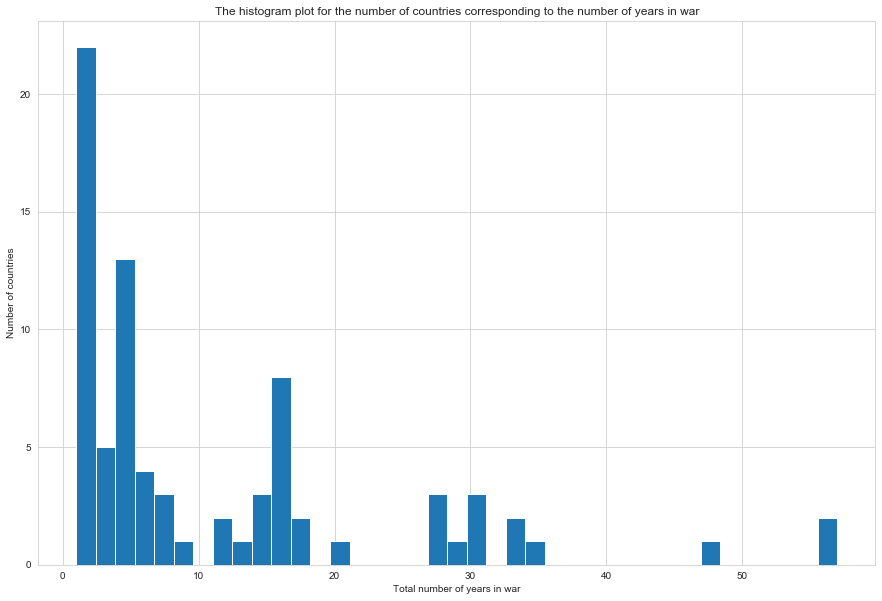

In [23]:
f, ax = plt.subplots(figsize=(15,10))
ax.hist(years_per_country['years'], bins=years_per_country.shape[0] // 2)
ax.set_title('The histogram plot for the number of countries corresponding to the number of years in war')
ax.set_xlabel('Total number of years in war')
_ = ax.set_ylabel('Number of countries')

Luckily enough, we can consider long wars quite exceptional.

#### Agriculture-related

Next, we want to plot the **total production of the crops per year and per country**, as an overall, general trend. In addition, we plot **similar** figures for the total amount of livestock for all countries, total agricultural area and total population, each per year and per country.

Before doing that let us check if the total periods of observation for each country are the same in order to exclude wrong interpretation of the data.

In [24]:
def sum_total_yearly_quantity(df):
    # Group by country and year, and sum the quantity up
    return  (
        df.groupby(['country', 'year'])
            .sum()
            .reset_index()
    )


# Sum the total production in all the datasets
total_productions_per_year_per_country = list(map(sum_total_yearly_quantity, dropped_agricultural_dfs))

# Unpack the list to individual dataframes
crop_per_year_per_country, \
livestock_per_year_per_country, \
population_per_year_per_country, \
land_per_year_per_country = total_productions_per_year_per_country

In [25]:
for name, df in zip(agricultural_dfs_names, total_productions_per_year_per_country):
    
    # Unique values in the total period of observations
    years_of_observations = df.groupby('country').count()['year'].unique()
    
    # Check if there is only one unique period (57 years) that corresponds to each country
    print('Years of observations for {} are the same for all countries: {}'.format(name, len(years_of_observations) == 1))

Years of observations for crops are the same for all countries: False
Years of observations for livestock are the same for all countries: False
Years of observations for population are the same for all countries: False
Years of observations for land are the same for all countries: False


As we can see, different countries have different years of collecting the data, let us show an example for the crop production.

In [26]:
# Get the unique numbers of monitored years
crop_years_observation = crop_per_year_per_country.groupby('country').count()['year'].unique()

crop_years_observation

array([57, 26, 18, 39, 55, 52, 25, 32, 24, 27, 12, 30, 31, 14,  6, 51, 29,
       50])

`crop_years_observation` array represents the different periods of times in which the country collected the crop production data. We see that some countries made observations for **57** years, but some countries observed for **26**, **18**, etc years. This should affect the interpretation of the total crop production of all countries per year. 

Let us see have a quick glance at which countries collected data for a smaller period of time.

In [27]:
counted_data = crop_per_year_per_country.groupby('country').count().drop('value', axis=1)

for observation in crop_years_observation[1:]:
    print('{} years of observation for these countries: {}'.format(observation, counted_data[counted_data['year'] == observation].index.tolist()))

26 years of observation for these countries: ['Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Croatia', 'Estonia', 'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'North Macedonia', 'Republic of Moldova', 'Russian Federation', 'Slovenia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']
18 years of observation for these countries: ['Belgium', 'Luxembourg']
39 years of observation for these countries: ['Belgium-Luxembourg']
55 years of observation for these countries: ['British Virgin Islands']
52 years of observation for these countries: ['Cayman Islands']
25 years of observation for these countries: ['Czechia', 'Eritrea', 'Ethiopia', 'Slovakia']
32 years of observation for these countries: ['Czechoslovakia', 'Ethiopia PDR']
24 years of observation for these countries: ['Marshall Islands']
27 years of observation for these countries: ['Micronesia (Federated States of)']
12 years of observation for these countries: ['Montenegro', 'Serbia']
30 years of 

We can see that different countries have different periods of observations. 

- It make sense that the [USSR](https://en.wikipedia.org/wiki/Soviet_Union), [Czechoslovakia](https://en.wikipedia.org/wiki/Czechoslovakia), [Yugoslavia SFR](https://en.wikipedia.org/wiki/Socialist_Federal_Republic_of_Yugoslavia), [Former Sudan and South Sudan](https://en.wikipedia.org/wiki/2011_South_Sudanese_independence_referendum), [Pacific Islands Trust Territory](https://en.wikipedia.org/wiki/Trust_Territory_of_the_Pacific_Islands) and [Ethiopia PDR](https://en.wikipedia.org/wiki/People%27s_Democratic_Republic_of_Ethiopia) have smaller periods of data collection as they **no more exist**, and have been replaced by other countries. The same can be said about [CIS member states](https://en.wikipedia.org/wiki/Commonwealth_of_Independent_States), Czechia, Serbia and other countries have smaller periods as they became **independent** recently. We can also suppose that data about Belgium and Luxembourg have been gathered together in a unique datapoint each year, until 1999. Hence we can conclude that the discrepancy between data time periods caused by these events does not influence our data.

- For other countries (United States Virgin Islands, Marshall Islands, Cayman Islands, etc) we can say that their contributions to the total production of crops, total amount of livestock, population and agricultural land area is **unsignificant** as they are really small and not global production leaders.

57 years is a **period long enough** to observe important changes at national level. However, the visualisation of total value of crop production/livestock/land area should not be affected by the changes proviously discussed.

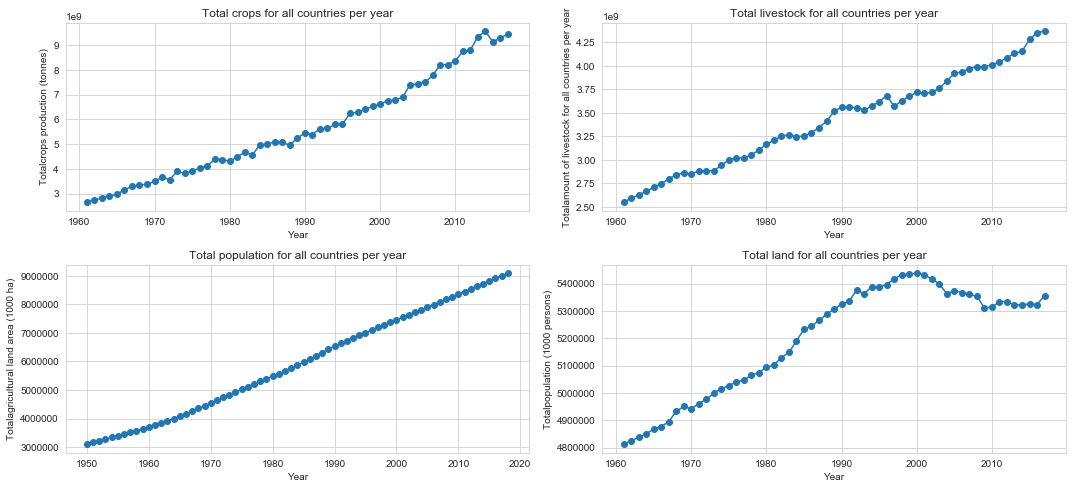

In [28]:
f, ax = plt.subplots(2, 2, figsize=(15, 7))

y_labels = [
    'crops production (tonnes)',
    'amount of livestock for all countries per year',
    'agricultural land area (1000 ha)',
    'population (1000 persons)'
]

for i, (df, name) in enumerate(zip(total_productions_per_year_per_country, agricultural_dfs_names)):
    prod_per_year = df.groupby('year').sum().reset_index()
    ax[i // 2, i % 2].plot_date(x=prod_per_year['year'], y=prod_per_year['value'], linestyle="-", xdate=True);
    ax[i // 2, i % 2].set_title(f'Total {name} for all countries per year')
    ax[i // 2, i % 2].set_xlabel('Year')
    ax[i // 2, i % 2].set_ylabel('Total' + y_labels[i])

f.tight_layout()

As expected, the total amount and production of goods **have increased** as well as the total population. Also we observe that the discrepancy of the time points of observation, indeed, does not influence the interpretation of the data. Interestingly, in the year 2000 the amount of agricultural land area reached its peak and then decreased. 

## Correlations

Our final aim is to **compare** the livestocks and agricultural production of different countries. Would it be fair though to compare big countries with tiny ones? Densely populated and almost uninhabited ones? We started looking for **normalisation** criteria. 
Of course, the *bare size* of a country is not a good normalization factor. What about Russia and its permafrost areas, or Egypt and its deserts?

We therefore came up with two factors that we believe to be more representative:
- **Agricultural area**: the actual amount of area used for cultivation. In this way we could compare the production expressed in [tonnes/km^2].This information is contained into the final_land_df.
- **Population**: the number of inhabitants of a country. In this way we could compare the production expressed in [tonnes-per-person] This information is contained into the final_population_df.

The following analysis has been done to understand if these criteria are valid and if we can really obtain more meaningful data by comparing normalised productions (both for area and population ) instead of the absolute one. In order to do so, we examined possible **correlations** between different observations in our datasets. 

First, let us calculate the correlation between **total production of crops**, the **amount of livestock** and the **agricultural area used** over the observed time period. If some time points are present in one dataset and missing in another, then we drop the row that corresponds to this time point. Also, now that we are digging deeper into the data, missing data could affect our results in a non-negligable way. Let us check this.

In [29]:
# Get a set representation of the countries for each dataset
crop_unique_countries = set(crop_per_year_per_country['country'].unique())
livestock_unique_countries = set(livestock_per_year_per_country['country'].unique())
population_unique_countries = set(population_per_year_per_country['country'].unique())
land_unique_countries = set(land_per_year_per_country['country'].unique())

# Get non-common countries
all_countries = crop_unique_countries.union(livestock_unique_countries, population_unique_countries, land_unique_countries)
intersected_set_of_countries = crop_unique_countries.intersection(livestock_unique_countries, population_unique_countries, land_unique_countries)
non_common_countries = all_countries.symmetric_difference(intersected_set_of_countries)
non_common_countries

{'Andorra',
 'Anguilla',
 'Aruba',
 'Bonaire, Sint Eustatius and Saba',
 'Channel Islands',
 'China, Macao SAR',
 'CuraÃ§ao',
 'Falkland Islands (Malvinas)',
 'Gibraltar',
 'Greenland',
 'Holy See',
 'Isle of Man',
 'Maldives',
 'Marshall Islands',
 'Mayotte',
 'Monaco',
 'Netherlands Antilles (former)',
 'Norfolk Island',
 'Northern Mariana Islands',
 'Palau',
 'Saint BarthÃ©lemy',
 'Saint-Martin (French Part)',
 'San Marino',
 'Sint Maarten (Dutch Part)',
 'Turks and Caicos Islands'}

The countries listed above are the non-overlapping countries, meaning that some data are missing. Most of them are not relevant for our project, hence we can exclude them for this initial analysis.

Now we can **merge** 4 agricultural datasets into one and calculate the Pearson correlations between 4 different features for each country: 

- Total crop production
- Total amount of livestock
- Total population
- Total agricultural land area

In [30]:
# Merge 4 datasets into one
merged_data = (crop_per_year_per_country 
                .merge(livestock_per_year_per_country, how='inner',
                    left_on=['country','year'], right_on = ['country','year'],
                    suffixes=('_crop', '_livestock'))
          
                .merge(population_per_year_per_country, how='inner',
                    left_on=['country','year'], right_on = ['country','year'])             
                .rename(columns={'value' : 'value_population'})
          
                .merge(land_per_year_per_country, how='inner',
                    left_on=['country','year'], right_on = ['country','year'])
                .rename(columns={'value' : 'value_land_area'})
         )

merged_data

,country,year,value_crop,value_livestock,value_population,value_land_area
0,Afghanistan,1961-01-01,5909080.0,25104700.0,9169.410,37700.0
1,Afghanistan,1962-01-01,5934534.0,25442170.0,9351.441,37760.0
2,Afghanistan,1963-01-01,5686583.0,25605000.0,9543.205,37810.0
3,Afghanistan,1964-01-01,6147934.0,25855300.0,9744.781,37873.0
4,Afghanistan,1965-01-01,6274668.0,26205500.0,9956.320,37875.0
...,...,...,...,...,...,...
11310,Zimbabwe,2013-01-01,3531221.0,11489859.0,13350.373,16200.0
11311,Zimbabwe,2014-01-01,3637340.0,9437613.0,13586.707,16200.0
11312,Zimbabwe,2015-01-01,2519574.0,9458463.0,13814.629,16200.0
11313,Zimbabwe,2016-01-01,3054562.0,10676793.0,14030.331,16200.0


In [31]:
# Calculate the correlation matrix for each country with 4 features
corr_data = merged_data.groupby('country').corr().fillna(0)

# Getting the paired correlations
crop_land_area_corr = corr_data.xs('value_crop', level=1)['value_land_area']
crop_population_corr = corr_data.xs('value_crop', level=1)['value_population']
livestock_population_corr = corr_data.xs('value_livestock', level=1)['value_population']

corr_data

value_crop  value_livestock  value_population  \
country                                                                       
Afghanistan value_crop          1.000000         0.295728          0.773567   
            value_livestock     0.295728         1.000000          0.064128   
            value_population    0.773567         0.064128          1.000000   
            value_land_area    -0.029503        -0.106985         -0.335440   
Albania     value_crop          1.000000         0.038380          0.591984   
...                                  ...              ...               ...   
Zambia      value_land_area     0.823103         0.942049          0.973502   
Zimbabwe    value_crop          1.000000         0.167213          0.079248   
            value_livestock     0.167213         1.000000          0.800283   
            value_population    0.079248         0.800283          1.000000   
            value_land_area    -0.032330         0.770684          0.938629   

                              value_land_area  
country                                        
Afghanistan value_crop              -0.029503  
            value_livestock         -0.106985  
            value_population        -0.335440  
            value_land_area          1.000000  
Albania     value_crop              -0.296381  
...                                       ...  
Zambia      value_land_area          1.000000  
Zimbabwe    value_crop              -0.032330  
            value_livestock          0.770684  
            value_population         0.938629  
            value_land_area          1.000000  

[884 rows x 4 columns]

A quick glance at the correlation matrix shows that some countries seem to rely more on livestock than on crop production to maitain their population growths. For example, in Afghanistan, we see that the population size has a very strong correlation with crop production and a nearly zero correlation with the total livestock. Looking at Zimbabwe, we see the exact opposite situation. We will plot these correlations in order to visualize the entire dataset.

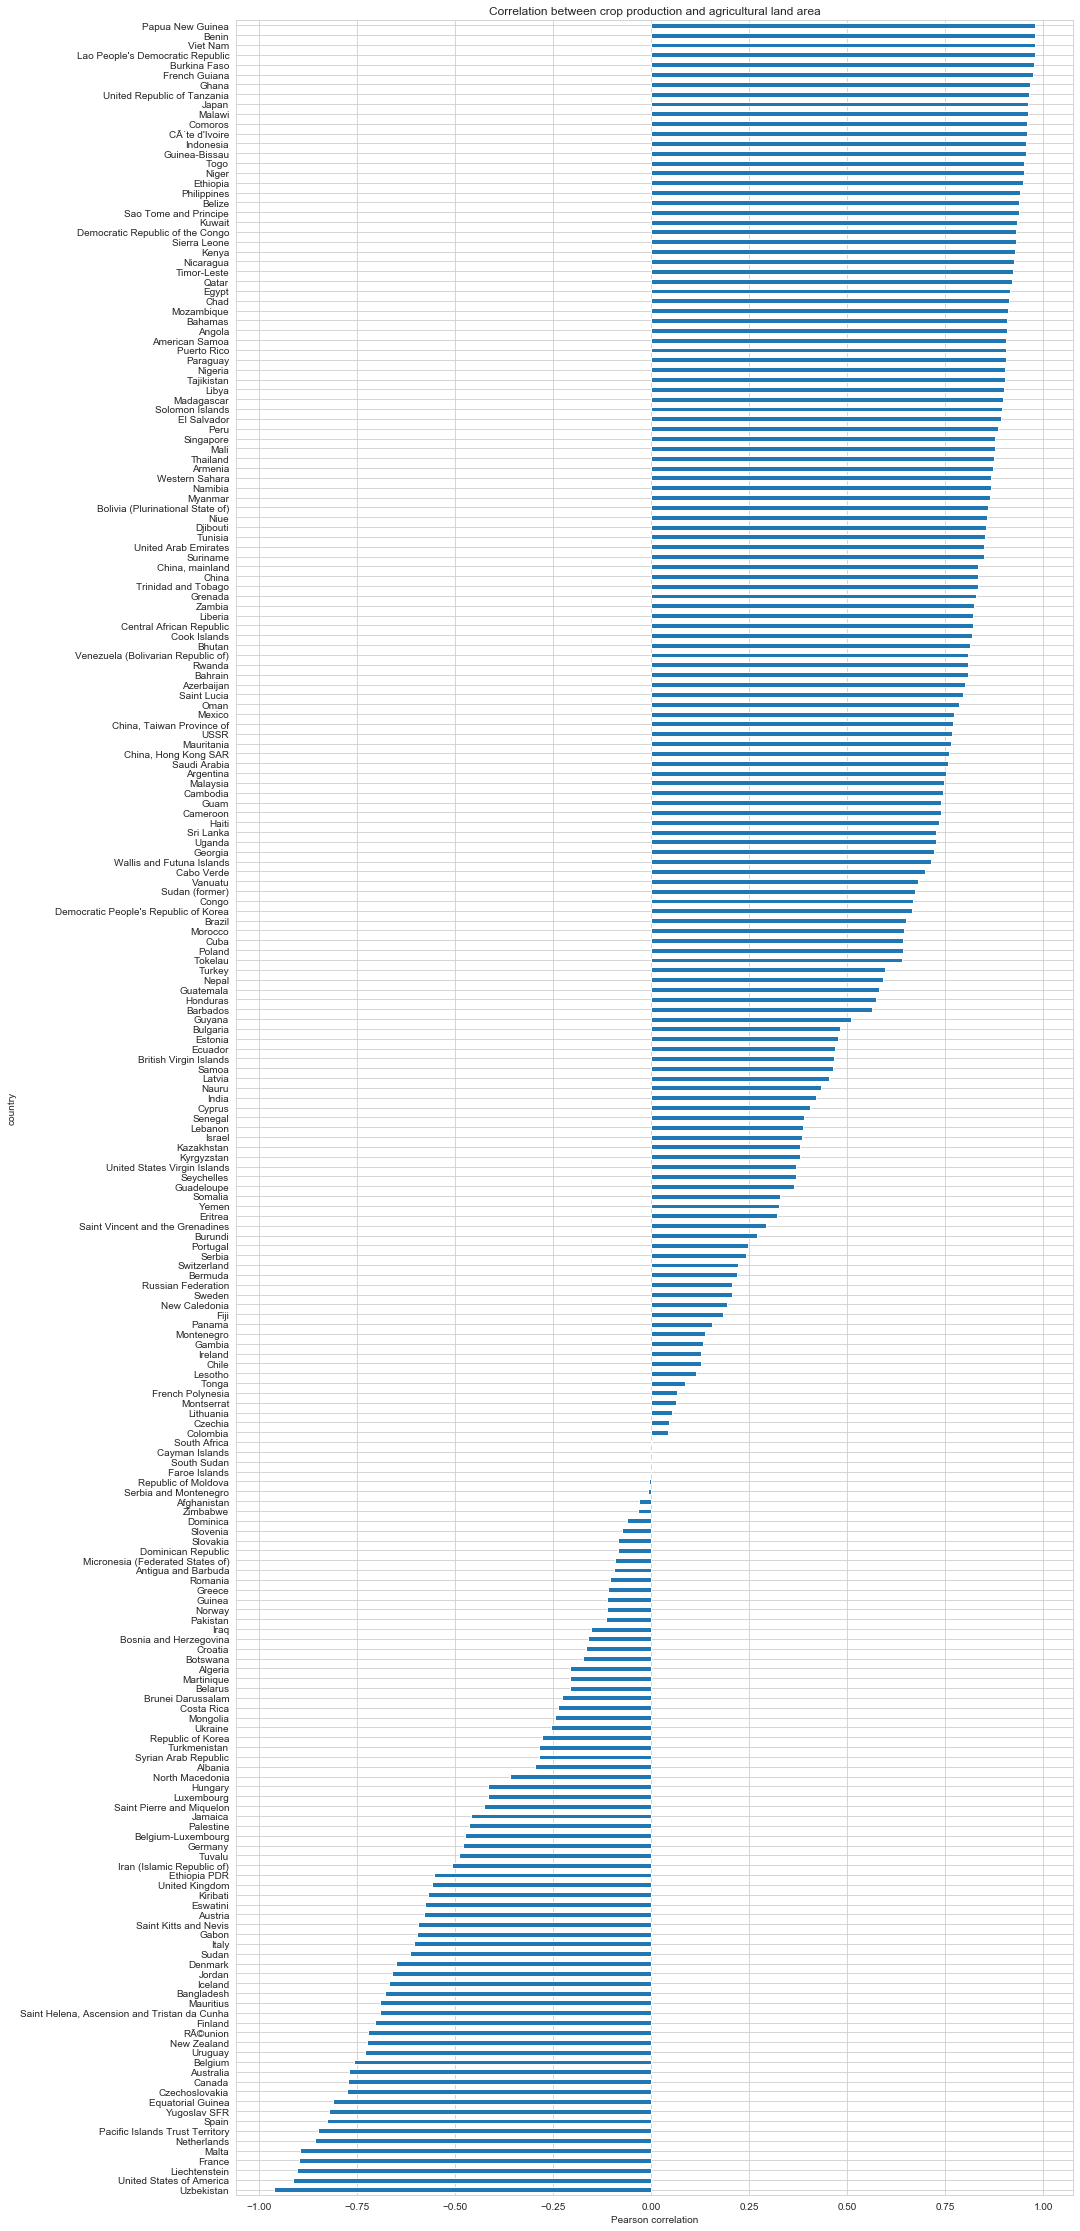

In [32]:
f, ax = plt.subplots(figsize=(15, 40))
crop_land_area_corr.sort_values().plot.barh(ax=ax)
ax.set_title('Correlation between crop production and agricultural land area')
ax.set_xlabel('Pearson correlation');

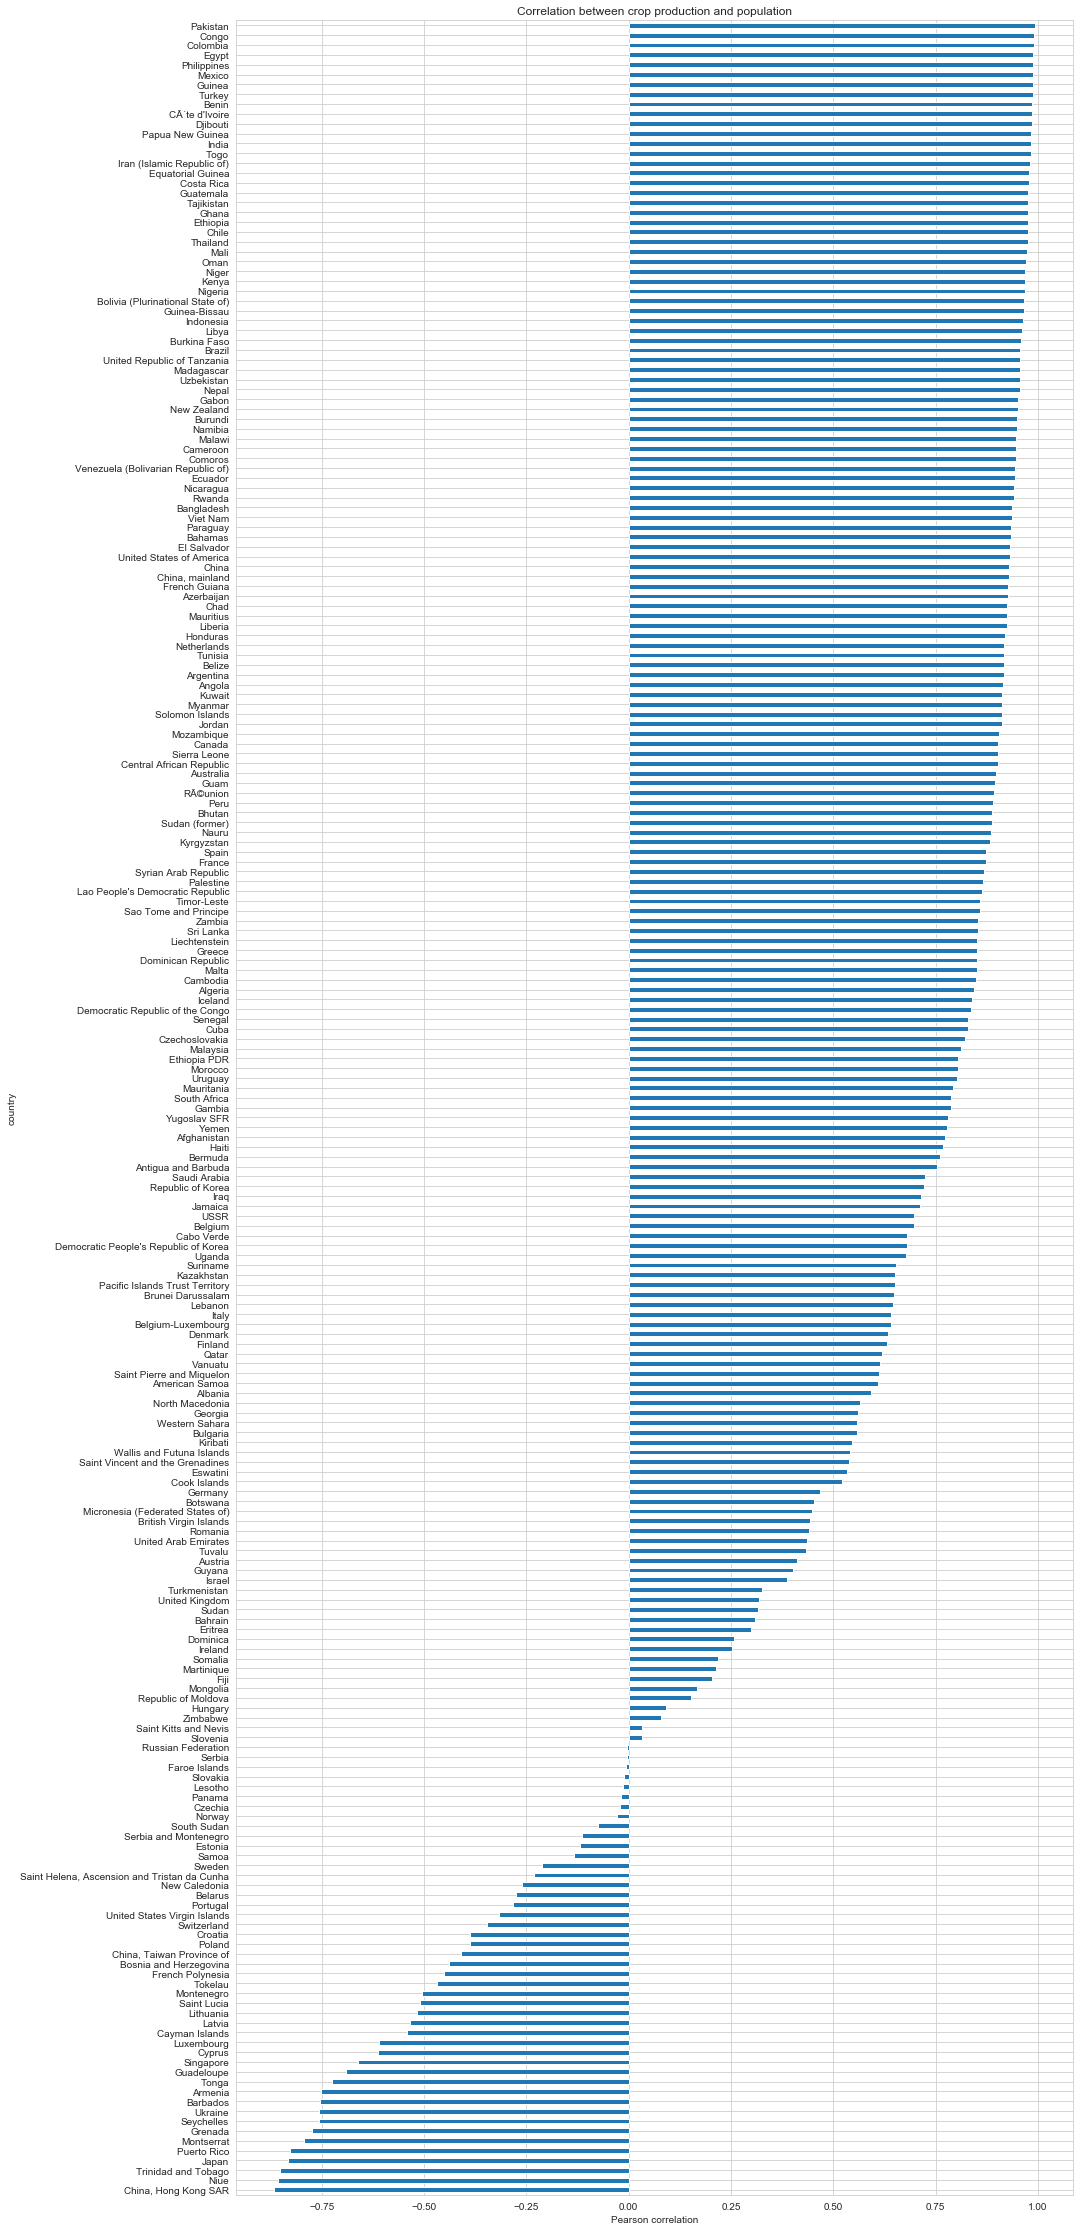

In [33]:
f, ax = plt.subplots(figsize=(15, 40))
crop_population_corr.sort_values().plot.barh(ax=ax)
ax.set_title('Correlation between crop production and population')
ax.set_xlabel('Pearson correlation');

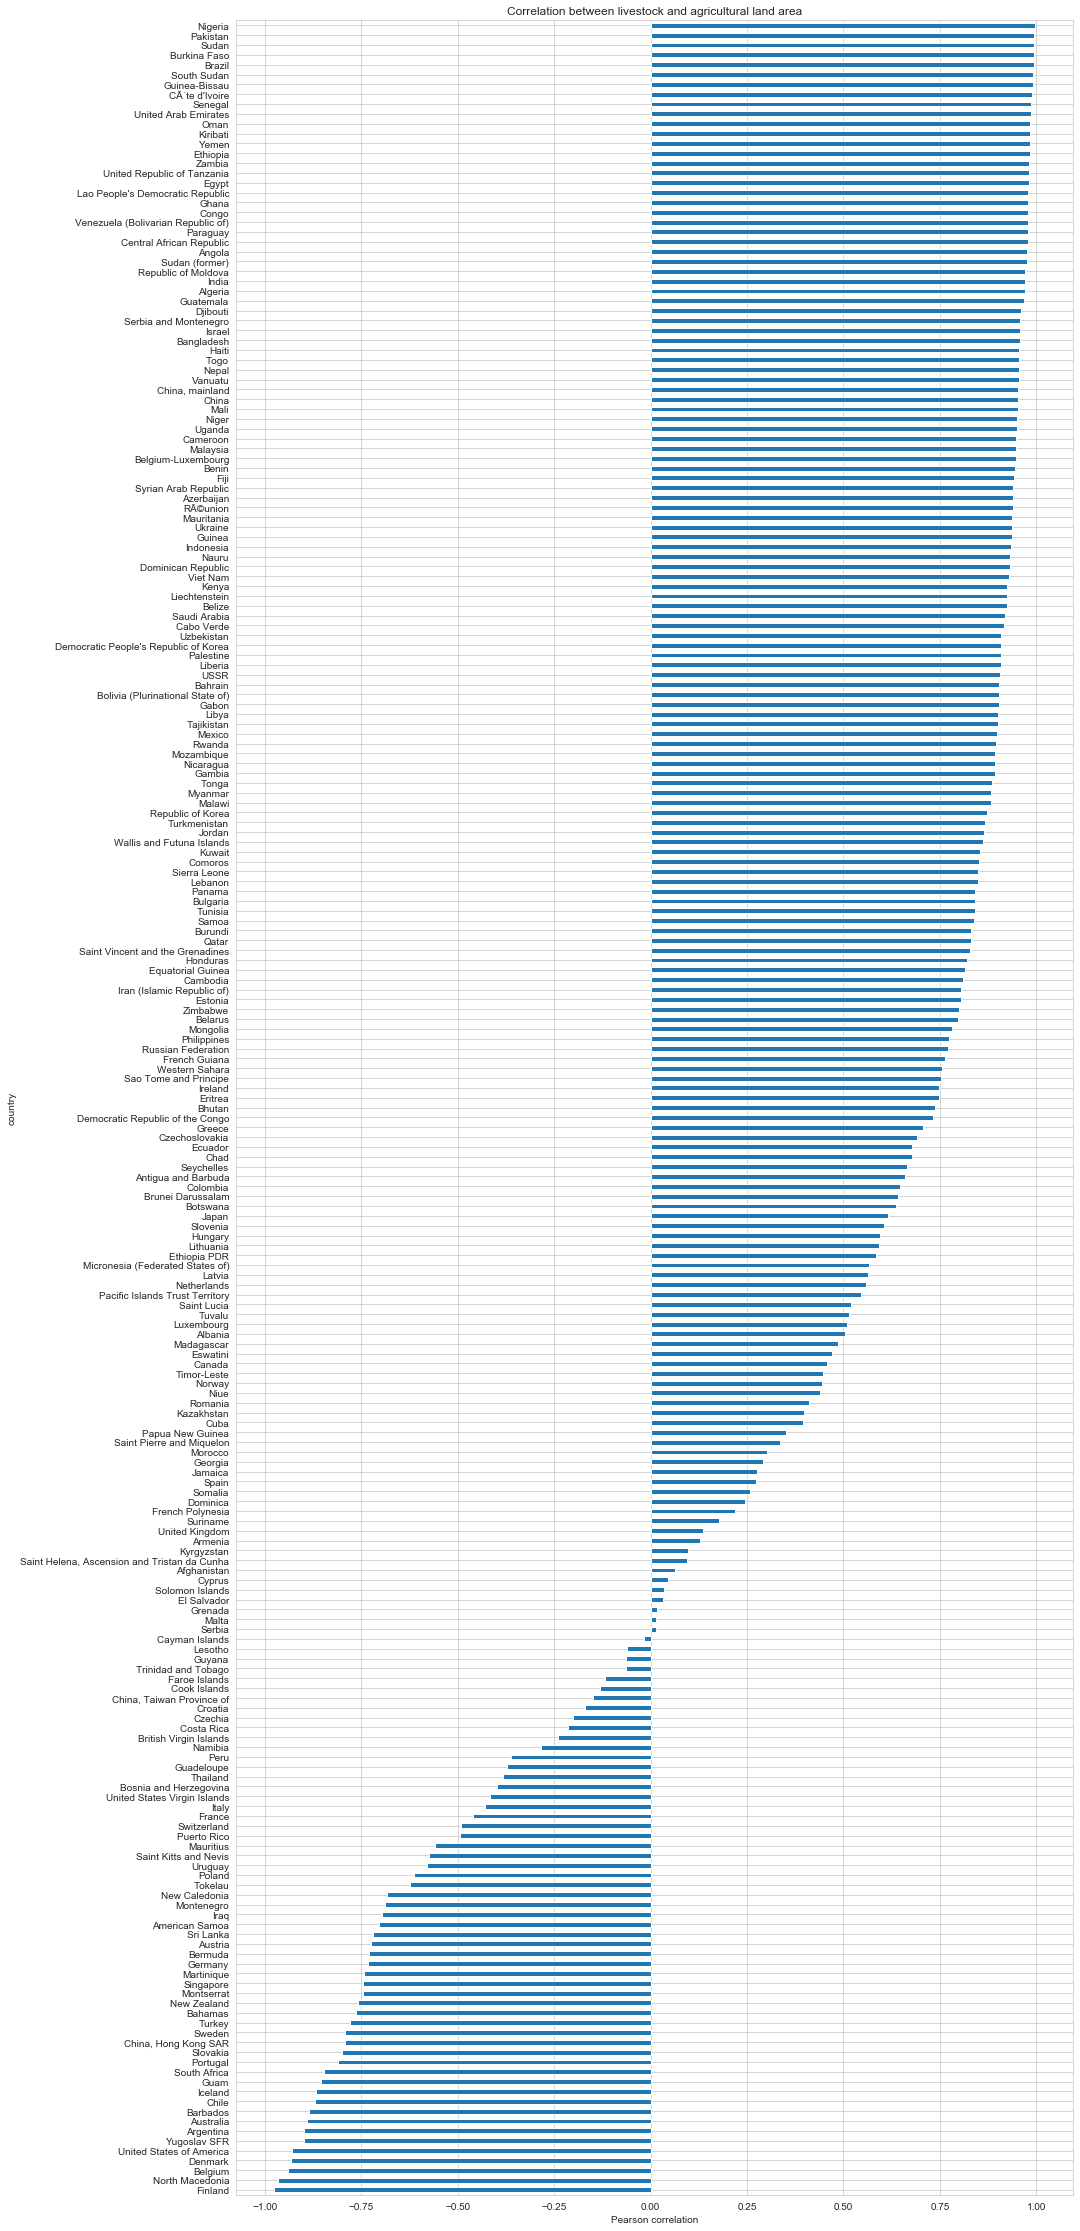

In [34]:
f, ax = plt.subplots(figsize=(15, 40))
livestock_population_corr.sort_values().plot.barh(ax=ax)
ax.set_title('Correlation between livestock and agricultural land area')
ax.set_xlabel('Pearson correlation');

Surpisingly, the **correlation** between our features is very **variable** with time and this is true for each country.

- The increase of the **use of the land for agriculture** does not necessarily cause the increase of the **crop production** and vice versa.
- The increase of the **population** does not necessarily cause the increase of the **crop production** and vice versa.
- The increase of the **population** does not necessarily cause the increase in the amount of **livestock** and vice versa.

We can conclude that both the population and the agricultural land area are **not good normalising factors**. Therefore, we should treat every feature as an independent one for future analysis.

In [35]:
# Export dataframes to CSV for use in other notebooks

export_csv = merged_data.to_csv(r'pandas_dfs/merged_data.csv', index = None, header=True)
export_csv = years_per_country.to_csv(r'pandas_dfs/years_per_country.csv', index = None, header=True)
export_csv = country_wars_df.to_csv(r'pandas_dfs/country_wars_df.csv', index = None, header=True)
export_csv = final_wars_df.to_csv(r'pandas_dfs/final_wars_df.csv', index = None, header=True)

## Our Project

At this point of our analysis, it is clear that the data we are dealing with is **complex** and that we need to narrow down our project to a smaller more manageable scope if we are to obtain meaningful results. Therefore, our goal is not to describe the general production trends for all the countries as there are simply too many factors that make each country and each war unique. Because of this, we doubt that we would be able to come to any insightful conclusions with a more general approach. 

This is why we have decided to only **focus on few cases** that have grasped our attention, in order to better estimate the impact of war on their unique situations. 

To select countries of interest, we created a plotting function that displays the evolution of crop and livestock production during war and non-war years. After visualizing many different countries with our function, interesting situations in Afghanistan and Lebanon have caught our attention. The plots can be seen below.

In [36]:
# Import our function for ploting. Function can be found in the src folder
from src.plots import plot_feature_and_war

In [37]:
final_wars_df.head()

,name,country,end_year,is_state,location,participant,start_year
0,Indo-Pakistani War of 1965.,People's Republic of China,1965-01-01,True,Kashmir,India,1965-01-01
1,Indo-Pakistani War of 1965.,People's Republic of China,1965-01-01,True,Kashmir,Pakistan,1965-01-01
2,Indo-Pakistani War of 1965.,Pakistan,1965-01-01,True,Kashmir,India,1965-01-01
3,Indo-Pakistani War of 1965.,Pakistan,1965-01-01,True,Kashmir,Pakistan,1965-01-01
4,Indo-Pakistani War of 1965.,India,1965-01-01,True,Kashmir,India,1965-01-01


In [38]:
merged_data.head()

,country,year,value_crop,value_livestock,value_population,value_land_area
0,Afghanistan,1961-01-01,5909080.0,25104700.0,9169.410,37700.0
1,Afghanistan,1962-01-01,5934534.0,25442170.0,9351.441,37760.0
2,Afghanistan,1963-01-01,5686583.0,25605000.0,9543.205,37810.0
3,Afghanistan,1964-01-01,6147934.0,25855300.0,9744.781,37873.0
4,Afghanistan,1965-01-01,6274668.0,26205500.0,9956.320,37875.0


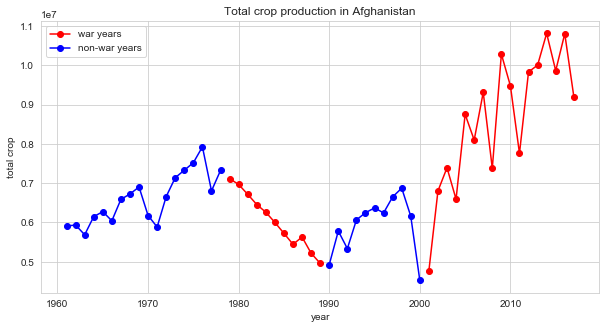

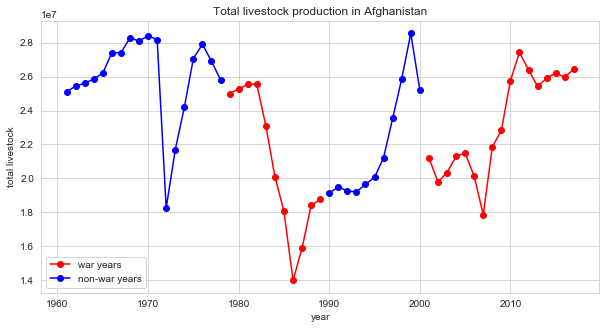

In [39]:
# Output plots for Afghanistan
country = "Afghanistan"

plot_feature_and_war(final_wars_df, merged_data, 'crop', country)
plot_feature_and_war(final_wars_df, merged_data, 'livestock', country)

The reason why we have chosen to further investigate this country is that it has been afflicted by two very different wars. During the first, both the crop production and the livestock amount have descreased substantially meanwhile in the second case, despite the war, things have improved significantly. This comes as a surprise and we want to better understand the key factors that have made this two conflict so different.

# Second scenario

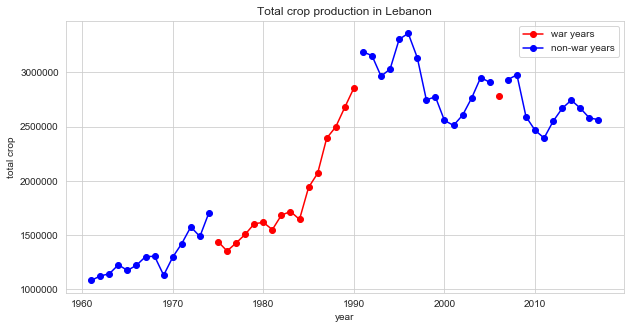

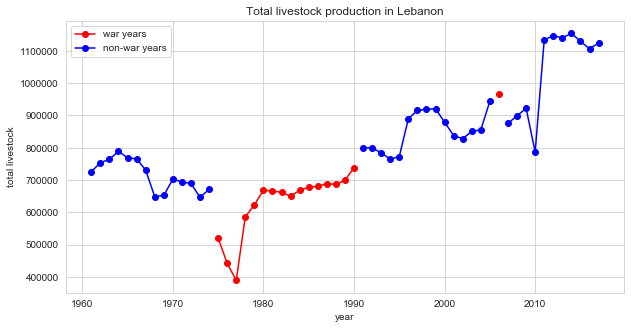

In [40]:
# Output plots for Lebanon, using item aggregated
country = "Lebanon"

plot_feature_and_war(final_wars_df, merged_data, 'crop', country)
plot_feature_and_war(final_wars_df, merged_data, 'livestock', country)

Here, there's a very different war. In fact, now we are dealing with a civil war. It is interesting to see that there was an initial dip in livestock production while the crop production seemed unaffected, or even improved. As this aspect sounds really strang to us, we will investigate more. That's why we'll use the item-specific data and no longer item aggregated. Before, let us have a look at the war in itself

In [41]:
leb_war = final_wars_df[final_wars_df['country'] == 'Lebanon']
leb_war.sort_values('start_year')

,name,country,end_year,is_state,location,participant,start_year
955,Lebanese Civil War,Lebanon,1990-01-01,False,Lebanon,Hezbollah,1975-01-01
952,Lebanese Civil War,Lebanon,1990-01-01,False,Lebanon,Amal Movement,1975-01-01
953,Lebanese Civil War,Lebanon,1990-01-01,False,Lebanon,Islamic Unification Movement,1975-01-01
954,Lebanese Civil War,Lebanon,1990-01-01,False,Lebanon,Lebanese National Movement,1975-01-01
956,Lebanese Civil War,Lebanon,1990-01-01,False,Lebanon,Lebanese Front,1975-01-01
995,Lebanon War,Lebanon,1985-01-01,False,Lebanon,Kurdistan Workers' Party,1982-01-01
994,Lebanon War,Lebanon,1985-01-01,False,Lebanon,Al-Mourabitoun,1982-01-01
993,Lebanon War,Lebanon,1985-01-01,False,Lebanon,Islamic Unification Movement,1982-01-01
992,Lebanon War,Lebanon,1985-01-01,False,Lebanon,Amal Movement,1982-01-01
991,Lebanon War,Lebanon,1985-01-01,False,Lebanon,Palestine Liberation Organization,1982-01-01


As the war in 2006 is only one year long, we decided not to analyse it, despite its importance, as its impact on agriculture could not be evidence in such a short time period.

In [42]:
civil_war = leb_war[leb_war['start_year']!= '2006'].sort_values('start_year')
civil_war

,name,country,end_year,is_state,location,participant,start_year
952,Lebanese Civil War,Lebanon,1990-01-01,False,Lebanon,Amal Movement,1975-01-01
953,Lebanese Civil War,Lebanon,1990-01-01,False,Lebanon,Islamic Unification Movement,1975-01-01
954,Lebanese Civil War,Lebanon,1990-01-01,False,Lebanon,Lebanese National Movement,1975-01-01
955,Lebanese Civil War,Lebanon,1990-01-01,False,Lebanon,Hezbollah,1975-01-01
956,Lebanese Civil War,Lebanon,1990-01-01,False,Lebanon,Lebanese Front,1975-01-01
711,Lebanon War,Lebanon,1985-01-01,True,Lebanon,Israel,1982-01-01
712,Lebanon War,Lebanon,1985-01-01,True,Lebanon,Syria,1982-01-01
990,Lebanon War,Lebanon,1985-01-01,False,Lebanon,Lebanese Front,1982-01-01
991,Lebanon War,Lebanon,1985-01-01,False,Lebanon,Palestine Liberation Organization,1982-01-01
992,Lebanon War,Lebanon,1985-01-01,False,Lebanon,Amal Movement,1982-01-01


So, there are two kind of partecipants. 5 partecipant from the beginning till the end (1975-1990), the other 10 are just involved for 3 years (1982-1985)

In [43]:
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [44]:
#taking the raw data about specific productions

# Set filenames
crops_leb_path = './data/FAOSTAT_data_12-7-2019.csv'

# Read the files
crops_leb_df = pd.read_csv(crops_leb_path, encoding='latin-1')

print(f"Length of dataframe: {crops_leb_df.size}")

Length of dataframe: 50890


In [45]:
crops_leb_df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,121,Lebanon,5510,Production,221,"Almonds, with shell",1961,1961,tonnes,2500.0,NaN,Official data
1,QC,Crops,121,Lebanon,5510,Production,221,"Almonds, with shell",1962,1962,tonnes,2800.0,NaN,Official data
2,QC,Crops,121,Lebanon,5510,Production,221,"Almonds, with shell",1963,1963,tonnes,3000.0,NaN,Official data
3,QC,Crops,121,Lebanon,5510,Production,221,"Almonds, with shell",1964,1964,tonnes,1800.0,NaN,Official data
4,QC,Crops,121,Lebanon,5510,Production,221,"Almonds, with shell",1965,1965,tonnes,2400.0,NaN,Official data


In [46]:
crops_leb_df.duplicated().sum()

0

In [162]:
crops_real = drop_useless_columns(crops_leb_df)
crops_real['year'] = crops_real['year'].dt.year
crops_real.head()

,country,item,year,value
0,Lebanon,"Almonds, with shell",1961,2500.0
1,Lebanon,"Almonds, with shell",1962,2800.0
2,Lebanon,"Almonds, with shell",1963,3000.0
3,Lebanon,"Almonds, with shell",1964,1800.0
4,Lebanon,"Almonds, with shell",1965,2400.0


In [99]:
# Create a new dataframe keeping only the rows in which there is a missing value.
null_data = crops_real[crops_real.isnull().any(axis=1)]

# Output new dataframe
null_data

,country,item,year,value
274,Lebanon,Avocados,1961,NaN
275,Lebanon,Avocados,1962,NaN
276,Lebanon,Avocados,1963,NaN
277,Lebanon,Avocados,1964,NaN
278,Lebanon,Avocados,1965,NaN
...,...,...,...,...
2604,Lebanon,Quinces,2013,NaN
2605,Lebanon,Quinces,2014,NaN
2606,Lebanon,Quinces,2015,NaN
2607,Lebanon,Quinces,2016,NaN


In [100]:
gp_null = null_data.groupby('item').count()
gp_null

,country,year,value
item,,,
Avocados,37,37,0
Carobs,37,37,0
"Chillies and peppers, green",27,27,0
Quinces,21,21,0


In [101]:
for item in gp_null.index:
    print("The product", item)
    years = gp_null.loc[item,'year']
    print( "was not produced for" , years, "years:")
    print("between ", "(", null_data[null_data['item']==item]['year'].max(), ")") 
    print("and ", "(", null_data[null_data['item']==item]['year'].min(),  ")", "for a total of")
    print((null_data[null_data['item']==item]['year'].max()-null_data[null_data['item']==item]['year'].min())+1, "years")

The product Avocados
was not produced for 37 years:
between  ( 1997 )
and  ( 1961 ) for a total of
37 years
The product Carobs
was not produced for 37 years:
between  ( 1997 )
and  ( 1961 ) for a total of
37 years
The product Chillies and peppers, green
was not produced for 27 years:
between  ( 1987 )
and  ( 1961 ) for a total of
27 years
The product Quinces
was not produced for 21 years:
between  ( 2017 )
and  ( 1997 ) for a total of
21 years


From this, we deduce that theese product were not produces in a continuous way for those period. We should refill those missingvalues with estimations

In [102]:
plotting = crops_real[['item','year','value']].pivot(index='item', columns='year', values='value')
plotting

year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
item,,,,,,,,,,,,,,,,,,,,,
"Almonds, with shell",2500.0,2800.0,3000.0,1800.0,2400.0,2392.0,5948.0,4557.0,2438.0,3521.0,...,30000.0,34300.0,27165.0,26485.0,30100.0,29656.0,29837.0,30019.0,30200.0,30381.0
"Anise, badian, fennel, coriander",40.0,50.0,50.0,50.0,50.0,50.0,30.0,27.0,NaN,NaN,...,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0
Apples,85000.0,80000.0,75000.0,125000.0,115080.0,104010.0,157021.0,162907.0,66547.0,74356.0,...,125200.0,138100.0,154429.0,135807.0,125714.0,126485.0,125807.0,125128.0,124449.0,123770.0
Apricots,6000.0,4000.0,5000.0,12500.0,10600.0,10915.0,8120.0,24503.0,11511.0,12952.0,...,32500.0,29000.0,20972.0,15041.0,24920.0,24952.0,24689.0,24425.0,24162.0,23898.0
Artichokes,3200.0,3200.0,3200.0,3300.0,750.0,800.0,720.0,518.0,518.0,486.0,...,657.0,600.0,1103.0,1169.0,646.0,680.0,680.0,680.0,680.0,680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Vegetables, leguminous nes",8000.0,8500.0,5500.0,6000.0,10800.0,8200.0,10448.0,5091.0,5464.0,6318.0,...,15000.0,10800.0,13016.0,13384.0,13075.0,13087.0,14000.0,12765.0,12543.0,12731.0
Vetches,2800.0,2200.0,2400.0,4050.0,4350.0,3040.0,5317.0,2631.0,3675.0,5049.0,...,2000.0,1300.0,700.0,720.0,800.0,825.0,836.0,117.0,107.0,98.0
"Walnuts, with shell",700.0,350.0,400.0,375.0,450.0,387.0,757.0,952.0,612.0,1109.0,...,2300.0,2000.0,1864.0,1735.0,1820.0,1809.0,1774.0,1740.0,1705.0,1670.0


We divide all the crops into high-nutrition and low-nutrition.

In [177]:
crops_real = drop_useless_columns(crops_leb_df)
crops_real['year'] = crops_real['year'].dt.year

shitty_crops = gp_null.index.to_list() + ['Okra', 'Lupins', 'Anise, badian, fennel, coriander', 'Pulses, nes']
crops_real_non_null = \
crops_real[~crops_real['item'].isin(shitty_crops)]

crops_prod_1975 = crops_real_non_null[crops_real_non_null['year'] == 1975].sort_values(by='value', ascending=False)
crops_prod_1990 = crops_real_non_null[crops_real_non_null['year'] == 1990].sort_values(by='value', ascending=False)

crops_prod_1975 = crops_prod_1975.reset_index().drop(columns=['index', 'country'])
crops_prod_1990 = crops_prod_1990.reset_index().drop(columns=['index', 'country'])

crops_prod_1975['position'] = (crops_prod_1975.index + 1).to_list()
crops_prod_1990['position'] = (crops_prod_1990.index + 1).to_list()

def name_tag(x):
    if x > 2:
        return 'increase'
    elif x < -2:
        return 'decrease'
    else:
        return 'stable'
df = crops_prod_1975.merge(crops_prod_1990, on='item', suffixes=('_1975', '_1990'))
df['change_position'] = df['position_1975'] - df['position_1990']
df['change_position'] = df['change_position'].apply(name_tag)

item_category = dict(zip(df['item'].to_list(), df['change_position'].to_list()))
crops_real_pivoted = crops_real_non_null.drop(columns='country').pivot(index='item', columns='year', values='value')
crops_real_pivoted['category'] = list(map(item_category.get, crops_real_pivoted.index.to_list()))

In [178]:
crops_real_pivoted

year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,category
item,,,,,,,,,,,,,,,,,,,,,
"Almonds, with shell",2500.0,2800.0,3000.0,1800.0,2400.0,2392.0,5948.0,4557.0,2438.0,3521.0,...,34300.0,27165.0,26485.0,30100.0,29656.0,29837.0,30019.0,30200.0,30381.0,stable
Apples,85000.0,80000.0,75000.0,125000.0,115080.0,104010.0,157021.0,162907.0,66547.0,74356.0,...,138100.0,154429.0,135807.0,125714.0,126485.0,125807.0,125128.0,124449.0,123770.0,decrease
Apricots,6000.0,4000.0,5000.0,12500.0,10600.0,10915.0,8120.0,24503.0,11511.0,12952.0,...,29000.0,20972.0,15041.0,24920.0,24952.0,24689.0,24425.0,24162.0,23898.0,stable
Artichokes,3200.0,3200.0,3200.0,3300.0,750.0,800.0,720.0,518.0,518.0,486.0,...,600.0,1103.0,1169.0,646.0,680.0,680.0,680.0,680.0,680.0,increase
Bananas,26000.0,25000.0,28000.0,22000.0,25340.0,29750.0,27157.0,29526.0,29361.0,36037.0,...,96000.0,87180.0,79925.0,63544.0,59650.0,60326.0,61001.0,61677.0,62352.0,decrease
Barley,12000.0,13100.0,10000.0,15000.0,12600.0,12723.0,15746.0,11567.0,6750.0,5878.0,...,29700.0,22110.0,30000.0,35000.0,35000.0,33000.0,31459.0,30000.0,30000.0,decrease
"Beans, dry",3000.0,3500.0,2800.0,3000.0,3400.0,3430.0,1620.0,1547.0,1699.0,1586.0,...,200.0,659.0,846.0,788.0,850.0,970.0,890.0,744.0,788.0,increase
"Beans, green",7000.0,8000.0,4000.0,4600.0,4500.0,4958.0,6260.0,6304.0,8722.0,12349.0,...,15900.0,27000.0,25000.0,26500.0,24610.0,23897.0,25642.0,26079.0,26515.0,increase
"Broad beans, horse beans, dry",1500.0,1600.0,900.0,1180.0,1500.0,1559.0,976.0,734.0,567.0,478.0,...,100.0,121.0,142.0,141.0,140.0,140.0,125.0,126.0,133.0,stable


In [113]:
shitty_crops = gp_null.index.to_list() + ['Okra', 'Lupin', 'Anise, badian, fennel, coriander']
crops_real_non_null = \
crops_real[~crops_real['item'].isin(shitty_crops)]

In [124]:
crops_prod_1975 = crops_real_non_null[crops_real_non_null['year'] == 1975].sort_values(by='value', ascending=False)
crops_prod_1990 = crops_real_non_null[crops_real_non_null['year'] == 1990].sort_values(by='value', ascending=False)

In [127]:
crops_prod_1975 = crops_prod_1975.reset_index().drop(columns=['index', 'country'])
crops_prod_1990 = crops_prod_1990.reset_index().drop(columns=['index', 'country'])

In [134]:
crops_prod_1975['position'] = (crops_prod_1975.index + 1).to_list()
crops_prod_1990['position'] = (crops_prod_1990.index + 1).to_list()

In [144]:
def name_tag(x):
    if x > 2:
        return 'increase'
    elif x < -2:
        return 'decrease'
    else:
        return 'stable'
df = crops_prod_1975.merge(crops_prod_1990, on='item', suffixes=('_1975', '_1990'))
df['change_position'] = df['position_1975'] - df['position_1990']
d['change_position'] = df['change_position'].apply(name_tag)

In [167]:
item_category = dict(zip(df['item'].to_list(), df['change_position'].to_list()))
crops_real_pivoted = crops_real.drop(columns='country').pivot(index='item', columns='year', values='value')
crops_real_pivoted['category'] = list(map(item_category.get, crops_real_pivoted.index.to_list()))

In [170]:
crops_real_pivoted

year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,category
item,,,,,,,,,,,,,,,,,,,,,
"Almonds, with shell",2500.0,2800.0,3000.0,1800.0,2400.0,2392.0,5948.0,4557.0,2438.0,3521.0,...,34300.0,27165.0,26485.0,30100.0,29656.0,29837.0,30019.0,30200.0,30381.0,stable
"Anise, badian, fennel, coriander",40.0,50.0,50.0,50.0,50.0,50.0,30.0,27.0,NaN,NaN,...,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,None
Apples,85000.0,80000.0,75000.0,125000.0,115080.0,104010.0,157021.0,162907.0,66547.0,74356.0,...,138100.0,154429.0,135807.0,125714.0,126485.0,125807.0,125128.0,124449.0,123770.0,decrease
Apricots,6000.0,4000.0,5000.0,12500.0,10600.0,10915.0,8120.0,24503.0,11511.0,12952.0,...,29000.0,20972.0,15041.0,24920.0,24952.0,24689.0,24425.0,24162.0,23898.0,stable
Artichokes,3200.0,3200.0,3200.0,3300.0,750.0,800.0,720.0,518.0,518.0,486.0,...,600.0,1103.0,1169.0,646.0,680.0,680.0,680.0,680.0,680.0,increase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Vegetables, leguminous nes",8000.0,8500.0,5500.0,6000.0,10800.0,8200.0,10448.0,5091.0,5464.0,6318.0,...,10800.0,13016.0,13384.0,13075.0,13087.0,14000.0,12765.0,12543.0,12731.0,increase
Vetches,2800.0,2200.0,2400.0,4050.0,4350.0,3040.0,5317.0,2631.0,3675.0,5049.0,...,1300.0,700.0,720.0,800.0,825.0,836.0,117.0,107.0,98.0,decrease
"Walnuts, with shell",700.0,350.0,400.0,375.0,450.0,387.0,757.0,952.0,612.0,1109.0,...,2000.0,1864.0,1735.0,1820.0,1809.0,1774.0,1740.0,1705.0,1670.0,stable


In [70]:
crops_prod_1975 = crops_real[crops_real['year'] == 1975].sort_values(by='value')
crops_prod_1990 = crops_real[crops_real['year'] == 1990].sort_values(by='value')
increased_crop_prod = crops_prod_1975[(crops_prod_1990['value'] - crops_prod_1975['value']) > 0]

/Users/MaximKryukov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
df = crops_prod_1975.merge(crops_prod_1990, on='item', suffixes=('_1975', '_1990'))

In [83]:
df_increase = df[df['value_1975'] < df['value_1990']] 
df_decrease = df[df['value_1975'] > df['value_1990']] 

In [87]:
df_increase.item.unique()

array(['Almonds, with shell', 'Apples', 'Apricots', 'Artichokes',
       'Bananas', 'Barley', 'Beans, dry', 'Beans, green',
       'Broad beans, horse beans, dry', 'Cabbages and other brassicas',
       'Carrots and turnips', 'Cauliflowers and broccoli', 'Cherries',
       'Chick peas', 'Cucumbers and gherkins', 'Eggplants (aubergines)',
       'Figs', 'Fruit, fresh nes', 'Garlic', 'Grapefruit (inc. pomelos)',
       'Grapes', 'Groundnuts, with shell', 'Lentils',
       'Lettuce and chicory', 'Maize', 'Melons, other (inc.cantaloupes)',
       'Nuts, nes', 'Olives', 'Onions, dry', 'Oranges',
       'Peaches and nectarines', 'Pears', 'Peas, dry', 'Peas, green',
       'Plums and sloes', 'Potatoes', 'Pulses, nes',
       'Pumpkins, squash and gourds', 'Quinces', 'Sesame seed', 'Sorghum',
       'Spices, nes', 'Spinach', 'Strawberries', 'Sugar beet',
       'Sugar cane', 'Sunflower seed',
       'Tangerines, mandarins, clementines, satsumas', 'Taro (cocoyam)',
       'Tomatoes', 'Vegetable

In [86]:
df_decrease.item.unique()

array(['Lemons and limes', 'Oats', 'Tobacco, unmanufactured', 'Vetches',
       'Wheat'], dtype=object)

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [55]:
def draw_barchart(year):
    dff = (crops_real[crops_real['year'].eq(str(year))]
           .sort_values(by='value', ascending=False)
           .head(15))
    dff = dff[::-1] 
    ax.clear()
    ax.barh(dff.index, dff['value']) # color=[colors[group_lk[x]] for x in dff['name']]
    dx = dff['value'].max() / 200
    for i, (value, item) in enumerate(zip(dff['value'], dff.index)):
        ax.text(value-dx, i,     item,           size=14, weight=600, ha='right', va='center')
        #ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value}',  size=14, ha='left',  va='center')
    # ... polished styles
    if (year<1991 and year >1974):
        ax.text(1, 0.4, year, transform=ax.transAxes, color='r', size=46, ha='right', weight=800)
    else:
        ax.text(1, 0.4, year, transform=ax.transAxes, color='g', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Production (tonnes)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most important agricultural production in Lebanon from 1961 to 2017',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @Pull Fiction', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    


/Users/MaximKryukov/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


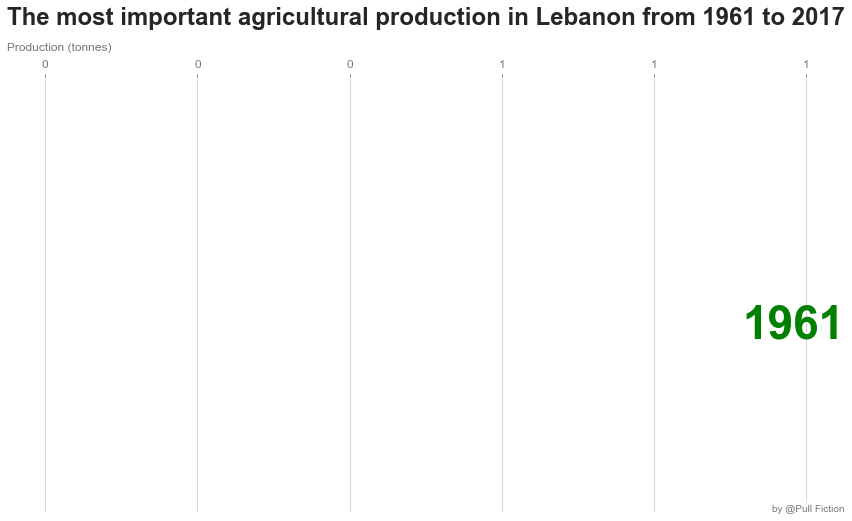

In [56]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1961, 2018),interval = 750)
HTML(animator.to_jshtml()) 